<a href="https://colab.research.google.com/github/sinhaanupamindia/Projects/blob/main/Customer_Segmentation_Recency_Frequency_Monetary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                             # Customer RFM Analysis 

In [ ]:
import pandas as pd
import numpy as np 
import time
import datetime as dt

import re       #Regular expression

In [ ]:
# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style('whitegrid')

start = time.time()

In [ ]:
df = pd.read_csv('D:/ANUPAM/study/project/Customer Segmentation- clustering/customer.csv', encoding = 'unicode_escape', dtype = {'CustomerID' : str})

# The first five rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [ ]:
df.shape

(541909, 8)

In [ ]:
# The last five rows 

df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680,France


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# Data Explorations:
'''Columns Description
InvoiceNo : Unique ID for every time a consumer visits the store
StockCode: Unique ID for a product
Description : Description of the product
Quantity : No of units bought
InvoiceDate : Date and time of purchase
Unit Price : Price for 1 unit of the product
CustomerId : Unique ID for each customer
Country : Country where transaction happened'''

In [ ]:
#changing the names of columns for ease of readability.

df.rename(index = str, columns = {'InvoiceNo': 'invoiceno',
                                    'StockCode': 'stockcode', 
                                    'Description' : 'description',
                                    'Quantity': 'quantity',
                                    'InvoiceDate' : 'invoicedate',
                                    'UnitPrice' : 'unitprice', 
                                    'CustomerID': 'customerid', 
                                    'Country' : 'country' }, inplace = True)

In [ ]:
# The data has 541909 entries and 8 variables before we make any adjustment
# After loading data set, we are trying to get general information about our dataset.

print('The shape of our dataset before we make any adjustment is', df.shape)

The shape of our dataset before we make any adjustment is (541909, 8)


In [ ]:
print('Some info about our dataset is below: \n')

df.info()

Some info about our dataset is below: 

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    541909 non-null  object 
 1   stockcode    541909 non-null  object 
 2   description  540455 non-null  object 
 3   quantity     541909 non-null  int64  
 4   invoicedate  541909 non-null  object 
 5   unitprice    541909 non-null  float64
 6   customerid   406829 non-null  object 
 7   country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 37.2+ MB


# Step 2: Data Cleaning

### Dealing with the missing data

In [ ]:
# One way in order to check for missing values 
# Unfortunately we have

df.isnull().values.any()

True

In [ ]:
# As we can see we have a lot of missing data in this dataset
# However some of them is not really important, so we don't have problem so far

print('Here we can view the missing data in our dataset: \n')

df.isnull().sum()

Here we can view the missing data in our dataset: 



invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [ ]:
print('Here we can view the percentage of the missing data in our dataset: \n')

missing_percentage = (( df.isnull().sum() / df.shape[0] ) * 100).round(2)
missing_percentage

Here we can view the percentage of the missing data in our dataset: 



invoiceno       0.00
stockcode       0.00
description     0.27
quantity        0.00
invoicedate     0.00
unitprice       0.00
customerid     24.93
country         0.00
dtype: float64

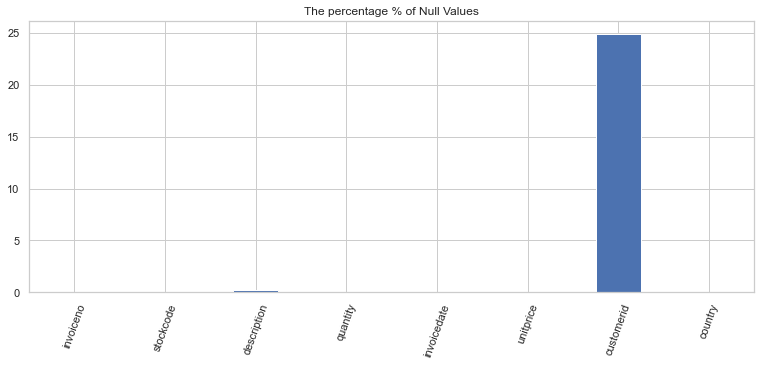

In [ ]:
fig,ax = plt.subplots( figsize=(13,5))
((df.isnull().sum() / len(df))*100).plot.bar(ax=ax,rot= 70)
ax.set_title('The percentage % of Null Values')
plt.show()

In [ ]:
# Droping rows having missing values

df.dropna(inplace=True)

print('Missing Values after the cleaning: {}'.format(df.isnull().sum().sum()))

Missing Values after the cleaning: 0


In [ ]:
#Double check it, just in case

df.isnull().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64

# Checking for duplicate rows

In [ ]:
duplicates_rows = df[df.duplicated()].value_counts().sum()
print('The total amount of duplicates rows are' , duplicates_rows)

The total amount of duplicates rows are 5225


In [ ]:
# View the duplicate rows 


df[df.duplicated()].head(20)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,12/1/2010 11:49,2.95,17920,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,12/1/2010 11:49,3.75,17920,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,12/1/2010 11:49,2.10,17920,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,12/1/2010 11:49,3.75,17920,United Kingdom


In [ ]:
# Sort the 5 most ordered products from most to least.

print('The most wanted items in the dataset are \n')

df.groupby('description')['quantity'].sum().sort_values(ascending = False).head(20).astype(int)

The most wanted items in the dataset are 



description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
BROCADE RING PURSE                    22960
VICTORIAN GLASS HANGING T-LIGHT       21984
ASSORTED COLOURS SILK FAN             21132
RED  HARMONICA IN BOX                 20912
JUMBO BAG PINK POLKADOT               19709
SMALL POPCORN HOLDER                  18208
60 TEATIME FAIRY CAKE CASES           17539
LUNCH BAG RED RETROSPOT               17145
HEART OF WICKER SMALL                 16640
JUMBO BAG STRAWBERRY                  16557
Name: quantity, dtype: int32

# Stock Code 

In [ ]:
# View all the stock code of the dataset 

list_special_codes = df[df['stockcode'].str.contains('^[a-zA-Z]+', regex=True)]['stockcode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [ ]:
for code in list_special_codes:
    print("{:<15} ->  {:<30}".format(code, df[df['stockcode'] == code]['description'].unique()[0]))

POST            ->  POSTAGE                       
D               ->  Discount                      
C2              ->  CARRIAGE                      
M               ->  Manual                        
BANK CHARGES    ->  Bank Charges                  
PADS            ->  PADS TO MATCH ALL CUSHIONS    
DOT             ->  DOTCOM POSTAGE                
CRUK            ->  CRUK Commission               


# Cancelled Orders & Quantity

In [ ]:
canceled = (df["invoiceno"].str.contains("C", na = False).sum())
print('The total number of items that was canceled are', canceled)

The total number of items that was canceled are 8905


In [ ]:
df.shape[0]

406829

In [ ]:
per_canceled = ((canceled)/ df.shape[0])*100
print('The percentage of canceled orders is ',per_canceled , '%')

The percentage of canceled orders is  2.188880340388714 %


In [ ]:
#checking negative number of quantity in the data

flag = False
if(df['quantity']<0).any():
    flag = True
    print(flag)

True


###### Creating canceled column in dataset

In [ ]:
df['canceled'] = df['invoiceno'].apply(lambda x : 'Yes' if x[0] == 'C' else 'No')
df[df['canceled'] == 'No']

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,No
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,No
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,No
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,No
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,No
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,No
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,No
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,No
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,No


In [ ]:
negative_quantity = df[df['quantity'] < 0]
negative_quantity.head()
print('The total number of items that was canceled are',negative_quantity.value_counts().sum() ) 

The total number of items that was canceled are 8905


In [ ]:
#dropping the rows with negative columns
df = df[df['quantity'] > 0]
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,No
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,No
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,No
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,No
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,No


In [ ]:
#the shape after dropping the data
df.shape

(397924, 9)

### Calculation of RMF


### Recency :  The freshness of customer activity be it purchases or visits

### Frequency : The number of purchases of the customers

### Monetary : The sum total of transaction value of customers.

In [ ]:
df['total_price'] = df['quantity'] * df['unitprice']
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,canceled,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,No,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,No,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,No,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,No,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,No,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,No,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,No,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,No,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,No,16.60


In [ ]:
#Sorting values according to its total price
df.sort_values('total_price', ascending = False).head().reset_index()

,index,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,canceled,total_price
0,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446,United Kingdom,No,168469.60
1,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346,United Kingdom,No,77183.60
2,222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,6/10/2011 15:28,649.50,15098,United Kingdom,No,38970.00
3,173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75,16029,United Kingdom,No,8142.75
4,348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,9/20/2011 11:05,5.06,17450,United Kingdom,No,7144.72


In [ ]:
#Number of products sold by country
product_country = df.groupby('country').count()['total_price'].sort_values(ascending = False).head(20)
product_country

country
United Kingdom     354345
Germany              9042
France               8342
EIRE                 7238
Spain                2485
Netherlands          2363
Belgium              2031
Switzerland          1842
Portugal             1462
Australia            1185
Norway               1072
Italy                 758
Channel Islands       748
Finland               685
Cyprus                614
Sweden                451
Austria               398
Denmark               380
Poland                330
Japan                 321
Name: total_price, dtype: int64

In [ ]:
present = dt.date(2011, 12, 9)
present


datetime.date(2011, 12, 9)

In [ ]:
today_date = dt.datetime(2011,12,11)

In [ ]:
df.head(1)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,canceled,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,No,15.3


### Creating RFM table

In [ ]:
## Change the format of the invoice_date 

df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df['invoicedate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: invoicedate, dtype: datetime64[ns]

In [ ]:


rfm =df.groupby('customerid').agg({'invoicedate' : lambda invoicedate : (today_date - invoicedate.max()).days,
                             'invoiceno':lambda invoiceno: invoiceno.nunique(),
                             'total_price': lambda total_price: total_price.sum()})
# Printing the dataframe
rfm.reset_index(level=0, inplace=True)
rfm.head()

,customerid,invoicedate,invoiceno,total_price
0,12346,326,1,77183.60
1,12347,3,7,4310.00
2,12348,76,4,1797.24
3,12349,19,1,1757.55
4,12350,311,1,334.40


In [ ]:
rfm.columns = ['customerid', 'recency', 'frequency', 'monetary']
rfm


,customerid,recency,frequency,monetary
0,12346,326,1,77183.60
1,12347,3,7,4310.00
2,12348,76,4,1797.24
3,12349,19,1,1757.55
4,12350,311,1,334.40
...,...,...,...,...
4334,18280,278,1,180.60
4335,18281,181,1,80.82
4336,18282,8,2,178.05
4337,18283,4,16,2094.88


<AxesSubplot:>

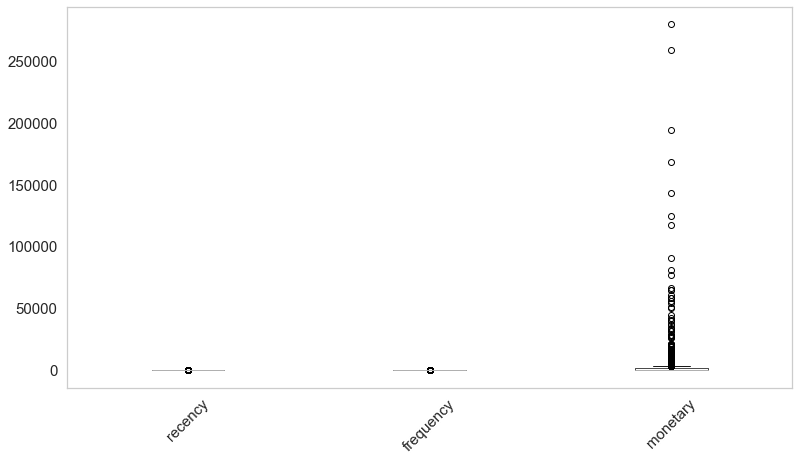

In [ ]:

#set sns theme
sns.set_theme(style="whitegrid")

#set plot size
fig, ax = plt.subplots(figsize=(13, 7))

rfm.boxplot(grid=False, rot=45, fontsize=15)


In [ ]:
#top 10 customers based on frequency and monetary values
# first we well sort on frequency and then on monetary values
#Below are top 10 customers after sorting

rfm.sort_values(['frequency', 'monetary'], ascending = [False, False], inplace = True)
rfm.head()

,customerid,recency,frequency,monetary
326,12748,1,210,33719.73
1880,14911,2,201,143825.06
4011,17841,2,124,40991.57
562,13089,3,97,58825.83
1662,14606,2,93,12156.65


In [ ]:
rfm_new = rfm.copy()

In [ ]:
# we will divide our columns in 5 quartiles.
rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels = range(1,6,1))
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method = 'first'), 5, labels = range(1, 6, 1))
rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels = range(1,6,1))

rfm.head()




,customerid,recency,frequency,monetary,recency_score,frequency_score,monetary_score
326,12748,1,210,33719.73,1,5,5
1880,14911,2,201,143825.06,1,5,5
4011,17841,2,124,40991.57,1,5,5
562,13089,3,97,58825.83,1,5,5
1662,14606,2,93,12156.65,1,5,5


In [ ]:
rfm[['frequency_score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 326 to 685
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   frequency_score  4339 non-null   category
dtypes: category(1)
memory usage: 38.3 KB


In [ ]:

rfm['RFM_Score'] = rfm[['recency_score', 'frequency_score', 'monetary_score']].sum(axis = 1).astype(int)


rfm['RFM_Segmentation'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)+ rfm['monetary_score'].astype(str)

rfm

,customerid,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_Score,RFM_Segmentation
326,12748,1,210,33719.73,1,5,5,11,155
1880,14911,2,201,143825.06,1,5,5,11,155
4011,17841,2,124,40991.57,1,5,5,11,155
562,13089,3,97,58825.83,1,5,5,11,155
1662,14606,2,93,12156.65,1,5,5,11,155
...,...,...,...,...,...,...,...,...,...
3324,16878,85,1,13.30,4,2,1,7,421
4099,17956,250,1,12.75,5,2,1,8,521
1794,14792,64,1,6.20,3,2,1,6,321
3218,16738,298,1,3.75,5,2,1,8,521


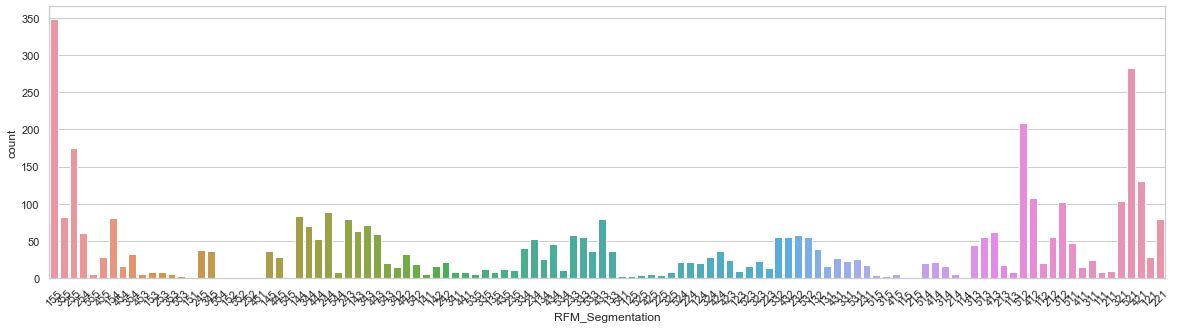

In [ ]:
#set sns theme
sns.set_theme(style = "whitegrid")

#set plot size
fig ,ax = plt.subplots(figsize = (20, 5))

#plot of each RFM segment

sns.countplot(x="RFM_Segmentation", data = rfm)
plt.xticks(rotation = 45)
plt.show()



In [ ]:
#Creating a column according to the customers score
# Create a new column accordingly to the customers score 

def rank(a):
    
    if (a>=0) and (a<=3):
        return 'Basic'
    
    elif (a<=7):
        return 'Advanced'
    
    elif (a<=13):
        return 'Gold'
    
    else:
        return 'Platinum'

In [ ]:
rfm['Rank_id'] = rfm['RFM_Score'].apply(rank) 
rfm.tail(10).reset_index()

,index,customerid,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_Score,RFM_Segmentation,Rank_id
0,4123,17986,57,1,20.80,3,2,1,6,321,Advanced
1,2745,16093,107,1,17.00,4,2,1,7,421,Advanced
2,723,13307,121,1,15.00,4,2,1,7,421,Advanced
3,2559,15823,373,1,15.00,5,2,1,8,521,Gold
4,3961,17763,264,1,15.00,5,2,1,8,521,Gold
5,3324,16878,85,1,13.30,4,2,1,7,421,Advanced
6,4099,17956,250,1,12.75,5,2,1,8,521,Gold
7,1794,14792,64,1,6.20,3,2,1,6,321,Advanced
8,3218,16738,298,1,3.75,5,2,1,8,521,Gold
9,685,13256,15,1,0.00,2,2,1,5,221,Advanced


In [ ]:
#Printing each segments category(Rank_id) with counts
rfm['Rank_id'].value_counts()

Gold        3231
Advanced    1062
Platinum      38
Basic          8
Name: Rank_id, dtype: int64

In [ ]:
#Using rfm_new dataset
rfm_new = rfm_new.drop(['customerid'], axis =1)

In [ ]:
rfm_new

,recency,frequency,monetary
326,1,210,33719.73
1880,2,201,143825.06
4011,2,124,40991.57
562,3,97,58825.83
1662,2,93,12156.65
...,...,...,...
3324,85,1,13.30
4099,250,1,12.75
1794,64,1,6.20
3218,298,1,3.75


In [ ]:
rfm_new.dropna(inplace = True)
rfm_new.isnull().sum()

recency      0
frequency    0
monetary     0
dtype: int64

### Applying K mean on rfm_new having recency, frequency and monetary

In [ ]:



kmeans = KMeans(n_clusters = 4, max_iter = 50)
kmeans.fit(rfm_new)

KMeans(max_iter=50, n_clusters=4)

In [ ]:
#kmeans.labels_ ---> labels of each clusters
#kmeans.inertia_ -->Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
#kmeans.n_iter_int ---> Number of iterations run.
#kmeans.n_features_in_ --> number of features seen during fit.

In [ ]:
kmeans.labels_

array([2, 1, 2, ..., 0, 0, 0])

In [ ]:
kmeans.n_features_in_

3

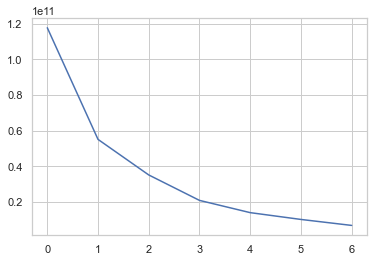

In [ ]:
ssd = []

range_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_cluster in range_clusters:
    kmeans = KMeans(num_cluster, max_iter = 50)
    kmeans.fit(rfm_new)
    ssd.append(kmeans.inertia_)
ssd

#plotting the WCSS with clusters
plt.plot(ssd)

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_new)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_new, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.9844910371693073
For n_clusters=3, the silhouette score is 0.958988385219034
For n_clusters=4, the silhouette score is 0.9543198507649769
For n_clusters=5, the silhouette score is 0.869785681781138
For n_clusters=6, the silhouette score is 0.7749401167852138
For n_clusters=7, the silhouette score is 0.7310136388199059
For n_clusters=8, the silhouette score is 0.7322254847172898


In [ ]:
# We will use k = 3 in this case from silhouette score and elbow point method
kmeans = KMeans(n_clusters = 3, max_iter = 50)
kmeans.fit(rfm_new)

KMeans(max_iter=50, n_clusters=3)

In [ ]:
rfm_new['Cluster_Id'] = kmeans.labels_
rfm_new.head()

,recency,frequency,monetary,Cluster_Id
326,1,210,33719.73,2
1880,2,201,143825.06,1
4011,2,124,40991.57,2
562,3,97,58825.83,2
1662,2,93,12156.65,0
